In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def loadData(filepath):
    chunks = []
    for chunk in pd.read_csv(filepath, low_memory=False, chunksize=1000):
        chunks.append(chunk)
    return chunks

In [4]:
df_business = pd.concat(loadData('C:/Users/amaur_5j86jzh/Desktop/TCC - Yelp/Datasets/yelp_business.csv'))

In [5]:
df_business_att = pd.concat(loadData('C:/Users/amaur_5j86jzh/Desktop/TCC - Yelp/Datasets/yelp_business_attributes.csv'))

In [6]:
df_checkin = pd.concat(loadData('C:/Users/amaur_5j86jzh/Desktop/TCC - Yelp/Datasets/yelp_checkin.csv'))

In [7]:
df_review = pd.concat(loadData('C:/Users/amaur_5j86jzh/Desktop/TCC - Yelp/Datasets/yelp_review.csv'))

In [89]:
df_business_cols = ['business_id', 'name', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories']
df_checkin_cols = ['business_id', 'checkins']
df_review_cols = ['business_id', 'stars', 'text']

In [ ]:
new_df_business = df_business.loc[:, df_business_cols]
new_df_checkin = df_checkin.loc[:, df_checkin_cols]
new_df_review = df_review.loc[:, df_review_cols]

In [ ]:
df_review_group = new_df_review.groupby(by='business_id')

df_review_teste = pd.DataFrame()
df_review_teste['starsMean'] = df_review_group['stars'].mean()

In [ ]:
df_checkin_group = new_df_checkin.groupby(by='business_id')

df_checkin_teste = pd.DataFrame()
df_checkin_teste['TotalCheckins'] = df_checkin_group['checkins'].sum()

In [ ]:
df_review_teste.reset_index(inplace=True)
df_checkin_teste.reset_index(inplace=True)

df = pd.merge(left=df_review_teste, right=df_checkin_teste,on='business_id',how='left')
df = pd.merge(left=new_df_business, right=df,on='business_id',how='left')
#df = pd.merge(left=df, right=df_business_att,on='business_id',how='left')
df

In [80]:
business_cats=';'.join(df['categories'])
cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
cats_ser = cats.category.value_counts()

cats_df = pd.DataFrame(cats_ser)
cats_df.reset_index(inplace=True)

cats_df

,index,category
0,Restaurants,54618
1,Shopping,27971
2,Food,24777
3,Beauty & Spas,17014
4,Home Services,16205
5,Health & Medical,14230
6,Nightlife,12154
7,Local Services,11232
8,Automotive,11052
9,Bars,10563


In [39]:
df.describe()

,latitude,longitude,stars,review_count,is_open,starsMean,TotalCheckins
count,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000,174567.000000,146350.000000
mean,38.627312,-92.679009,3.632196,30.137059,0.840376,3.631343,1.754554
std,5.389012,26.240079,1.003739,98.208174,0.366258,0.995509,4.707560
min,-36.086009,-142.466650,1.000000,3.000000,0.000000,1.000000,1.000000
25%,33.631550,-112.125879,3.000000,4.000000,1.000000,3.000000,1.000000
50%,36.144257,-89.410128,3.500000,8.000000,1.000000,3.714286,1.000000
75%,43.606181,-79.657609,4.500000,23.000000,1.000000,4.400000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000,5.000000,861.000000


In [40]:
df.isnull().sum()

business_id                              0
name                                     0
latitude                                 1
longitude                                1
stars                                    0
review_count                             0
is_open                                  0
categories                               0
starsMean                                0
TotalCheckins                        28217
AcceptsInsurance                     22526
ByAppointmentOnly                    22526
BusinessAcceptsCreditCards           22526
BusinessParking_garage               22526
BusinessParking_street               22526
BusinessParking_validated            22526
BusinessParking_lot                  22526
BusinessParking_valet                22526
HairSpecializesIn_coloring           22526
HairSpecializesIn_africanamerican    22526
HairSpecializesIn_curly              22526
HairSpecializesIn_perms              22526
HairSpecializesIn_kids               22526
HairSpecial

In [77]:
round(df.isnull().mean() * 100, 2)

business_id                           0.00
name                                  0.00
latitude                              0.00
longitude                             0.00
stars                                 0.00
review_count                          0.00
is_open                               0.00
categories                            0.00
starsMean                             0.00
TotalCheckins                        16.16
AcceptsInsurance                     12.90
ByAppointmentOnly                    12.90
BusinessAcceptsCreditCards           12.90
BusinessParking_garage               12.90
BusinessParking_street               12.90
BusinessParking_validated            12.90
BusinessParking_lot                  12.90
BusinessParking_valet                12.90
HairSpecializesIn_coloring           12.90
HairSpecializesIn_africanamerican    12.90
HairSpecializesIn_curly              12.90
HairSpecializesIn_perms              12.90
HairSpecializesIn_kids               12.90
HairSpecial

In [23]:
df_business.loc[df_business['city'].isnull(), 'city'] = 'Edinburgh'

In [28]:
df_business.loc[df_business['state'].isnull(), 'city'] = 'Henderson'
df_business.loc[df_business['state'].isnull(), 'state'] = 'NV'

In [31]:
df_business.loc[df_business['latitude'].isnull(), 'longitude'] = '-79.65156555'
df_business.loc[df_business['latitude'].isnull(), 'latitude'] = '43.78596696'

In [34]:
df_business_att.isnull().sum()

business_id                          0
AcceptsInsurance                     0
ByAppointmentOnly                    0
BusinessAcceptsCreditCards           0
BusinessParking_garage               0
BusinessParking_street               0
BusinessParking_validated            0
BusinessParking_lot                  0
BusinessParking_valet                0
HairSpecializesIn_coloring           0
HairSpecializesIn_africanamerican    0
HairSpecializesIn_curly              0
HairSpecializesIn_perms              0
HairSpecializesIn_kids               0
HairSpecializesIn_extensions         0
HairSpecializesIn_asian              0
HairSpecializesIn_straightperms      0
RestaurantsPriceRange2               0
GoodForKids                          0
WheelchairAccessible                 0
BikeParking                          0
Alcohol                              0
HasTV                                0
NoiseLevel                           0
RestaurantsAttire                    0
Music_dj                 

In [35]:
df_checkin.isnull().sum()

business_id    0
weekday        0
hour           0
checkins       0
dtype: int64

In [36]:
df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

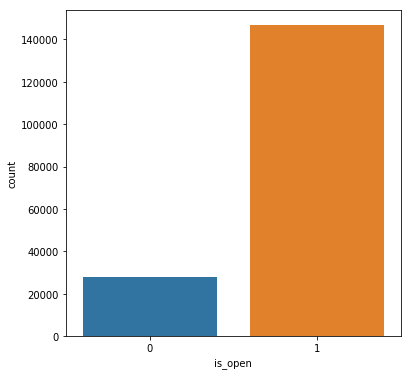

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='is_open',data=df_business);

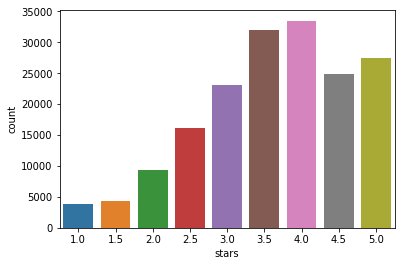

In [13]:
sns.countplot(x='stars',data=df_business);